In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import nltk
from nltk.tokenize import word_tokenize
import warnings
warnings.simplefilter("ignore")

In [2]:
train_df = pd.read_csv('C:/Users/KHUSHI AGGARWAL/Downloads/train.tsv',sep='\t')
test_df = pd.read_csv('C:/Users/KHUSHI AGGARWAL/Downloads/test.tsv', sep='\t')

In [3]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


<Axes: >

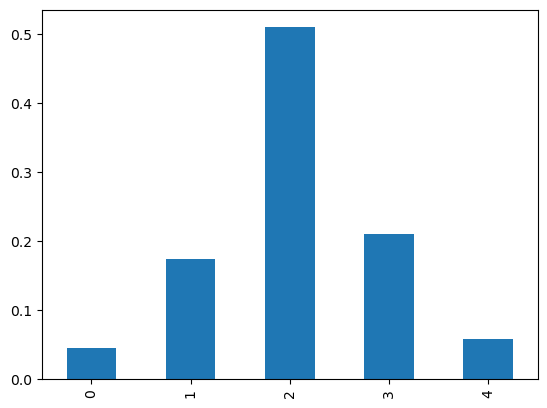

In [4]:
train_df.Sentiment.value_counts(normalize =True).sort_index().plot(kind='bar')

In [5]:
train_df.Phrase.sample(10).values

array(['Wittgenstein and',
       'appear together on a marquee , especially when the payoff is an unschooled comedy like Stealing Harvard , which fails to keep 80 minutes from seeming like 800',
       ", like Ravel 's Bolero , builds to a crescendo that encompasses many more paths than we started with",
       'Gives us a lot to chew on , but not all of it',
       'too erotic nor very thrilling',
       'are too immature and unappealing to care about .',
       'the pushiness and decibel volume of most contemporary comedies',
       'that most high-concept films candy-coat with pat storylines , precious circumstances and beautiful stars',
       'is depressing , ruthlessly pained and depraved',
       'for on-screen chemistry'], dtype=object)

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\KHUSHI
[nltk_data]     AGGARWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
word_tokenize('you really wanna go with us?, that would be fantastic')

['you',
 'really',
 'wan',
 'na',
 'go',
 'with',
 'us',
 '?',
 ',',
 'that',
 'would',
 'be',
 'fantastic']

In [8]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')

In [9]:
def tokenize (text):
   return [stemmer.stem(token) for token in word_tokenize(text)]

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\KHUSHI
[nltk_data]     AGGARWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
def tokenizeWithoutPunctuation (text):
   return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [13]:
selected_stopwords = english_stopwords[:115]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer =tokenizeWithoutPunctuation,
                            stop_words=selected_stopwords,
                            ngram_range=(1,2),
                            max_features =2000)
vectorizer.fit(train_df.Phrase)

TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenizeWithoutPunctuation at 0x000002A8880F5CF0>)

In [14]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

In [15]:
inputs =  vectorizer.transform(train_df.Phrase)
inputs.shape

(156060, 2000)

In [16]:
inputs.toarray()[0][:100]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [18]:
test_inputs =  vectorizer.transform(test_df.Phrase)
test_inputs.shape

(66292, 2000)

In [19]:
TRAIN_SIZE =110_000
train_inputs = inputs[:TRAIN_SIZE]
train_targets = train_df.Sentiment[:TRAIN_SIZE]
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [20]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = train_df.Sentiment[TRAIN_SIZE:]
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(verbose=2, n_jobs= -1, max_iter=500)
lr_model.fit(train_inputs, train_targets)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   30.3s finished


LogisticRegression(max_iter=500, n_jobs=-1, verbose=2)

In [22]:
train_preds = lr_model.predict(train_inputs)
train_preds

array([3, 2, 2, ..., 0, 0, 2], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets,train_preds)

0.6392272727272728

In [24]:
val_preds = lr_model.predict(val_inputs)
accuracy_score(val_targets, val_preds)

0.5792661745549283

In [25]:

test_preds = lr_model.predict(test_inputs)
test_preds

array([3, 3, 2, ..., 2, 2, 1], dtype=int64)

In [26]:
phrase_ids = test_df['PhraseId']


In [27]:
submission = pd.DataFrame({
    'PhraseId': phrase_ids,
    'Sentiment': test_preds
})
submission.head()

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3


In [28]:
submission.tail()

,PhraseId,Sentiment
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2
66291,222352,1


In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_inputs,train_targets)

DecisionTreeClassifier()

In [30]:
dt_train_preds = dt_model.predict(train_inputs)
accuracy_score(train_targets, dt_train_preds)

0.7902727272727272

In [31]:
dt_val_preds = dt_model.predict(val_inputs)
accuracy_score(val_targets, dt_val_preds )

0.5284628745115068

In [32]:
test_pred = dt_model.predict(test_inputs)
test_pred

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [33]:
submission = pd.DataFrame({
    'PhraseId': phrase_ids,
    'Sentiment': test_pred
})
submission.head(20)

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
5,156066,2
6,156067,2
7,156068,2
8,156069,2
9,156070,2


In [34]:
submission.tail()

,PhraseId,Sentiment
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2
66291,222352,1
